In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!ls '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET'

Mounted at /content/gdrive
0   17	25  33	8
1   18	26  34	9
10  19	27  35	train_img_edgeshape_removedundetected.npy
11  2	28  36	train_img_edgeshape_removedundetected_unaugment.npy
12  20	29  37	train_img_poseblack_removedundetected.npy
13  21	3   4	train_label_edgeshape_removedundetected.npy
14  22	30  5	train_label_edgeshape_removedundetected_unaugment.npy
15  23	31  6	train_label_poseblack_removedundetected.npy
16  24	32  7


In [ ]:
import os
import pathlib
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
class_list=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']


dataset_path = '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET'
image_paths = []
labels = []

for i in class_list:
    for folder_name in os.listdir(dataset_path):
        if folder_name == i:
            folder_path = os.path.join(dataset_path, folder_name)
            image_paths.append(folder_path)

for i in image_paths:
    print(i.rsplit('/', 1)[-1])

print(image_paths)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
['/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/0', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/1', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/2', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/3', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/4', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/5', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/6', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/7', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/8', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/9', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/10', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/11', '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/12', '/content/gdrive/MyDrive/Datasets/

## Train maker

In [ ]:
dataset_path = '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET'

In [ ]:
train_images = []
train_labels = []
print(os.listdir(dataset_path))
# Loop through the directories in the dataset path
for class_name in os.listdir(dataset_path):
    # If the directory name is not in class_list, skip it
    if class_name not in class_list:
        continue
    class_path = os.path.join(dataset_path, class_name)
    # Loop through the images in the class directory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Load the image and append it to the images list
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64,64), interpolation = cv2.INTER_AREA)
        image = image.astype('float32')

        min_val = np.min(image)
        max_val = np.max(image)
        image = (image - min_val) / (max_val - min_val)

        train_images.append(image)
        # Append the label to the labels list
        label = int(class_name)
        train_labels.append(label)
# Convert the images and labels to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Print the shapes of the arrays
print(train_images.shape)
print(train_labels.shape)

['9', '6', '8', '7', '5', '4', '30', '34', '36', '31', '3', '37', '32', '35', '33', '29', '25', '22', '26', '21', '24', '23', '27', '20', '28', '2', '15', '12', '16', '19', '14', '13', '11', '17', '18', '0', '10', '1', 'train_label_poseblack_removedundetected.npy', 'train_img_poseblack_removedundetected.npy', 'train_img_edgeshape_removedundetected_unaugment.npy', 'train_label_edgeshape_removedundetected_unaugment.npy', 'train_img_edgeshape_removedundetected.npy', 'train_label_edgeshape_removedundetected.npy']
(11060, 64, 64, 3)
(11060,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Set the batch size
batch_size = 32

# Define the data generator for image augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Use the flow_from_directory method to generate batches of augmented images
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_list,
    shuffle=True)

# Print the number of classes and the class indices
num_classes = train_generator.num_classes
class_indices = train_generator.class_indices
print('Number of classes:', num_classes)
print('Class indices:', class_indices)

Found 11060 images belonging to 38 classes.
Number of classes: 38
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37}


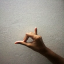

(11060, 64, 64, 3)
(11060,)


In [ ]:
cv2_imshow(train_images[299]*255)

print(train_images.shape)
print(train_labels.shape)

In [ ]:
# Create an image data generator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_new_images = 11061*6

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.1,
                             zoom_range=0.1, horizontal_flip=True,
                             fill_mode='nearest')

# Generate new images and labels
new_images = []
new_labels = []
for i in range(num_new_images):
    batch = datagen.flow(train_images, train_labels, batch_size=1)
    new_image, new_label = batch.next()
    new_images.append(new_image[0])
    new_labels.append(new_label[0])

# Convert the images and labels to NumPy arrays
new_images = np.array(new_images)
new_labels = np.array(new_labels)

# Concatenate the new images and labels with the original ones
train_images = np.concatenate([train_images, new_images])
train_labels = np.concatenate([train_labels, new_labels])

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(77426, 64, 64, 3)
(77426,)


In [ ]:
np.save('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_img_normalized.npy', train_images)
np.save('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_DATASET/train_label_normalized.npy', train_labels)

In [ ]:
del train_images
del train_labels

In [ ]:
del new_images
del new_labels

# Test maker

In [ ]:
dataset_path_test = '/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_TESTING_DATA'

In [ ]:
test_images = []
test_labels = []
# Loop through the directories in the dataset path
for class_name in os.listdir(dataset_path_test):
    # If the directory name is not in class_list, skip it
    if class_name not in class_list:
        continue
    class_path = os.path.join(dataset_path_test, class_name)
    # Loop through the images in the class directory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Load the image and append it to the images list
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64,64), interpolation = cv2.INTER_AREA)
        image = image.astype('float32')

        min_val = np.min(image)
        max_val = np.max(image)
        image = (image - min_val) / (max_val - min_val)

        # image = image/255.0
        test_images.append(image)
        # Append the label to the labels list
        label = int(class_name)
        test_labels.append(label)


# Convert the images and labels to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Print the shapes of the arrays
print(test_images.shape)
print(test_labels.shape)

(1520, 64, 64, 3)
(1520,)


In [ ]:
np.save('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_TESTING_DATA/test_img_normalized.npy', test_images)
np.save('/content/gdrive/MyDrive/Datasets/Dataset_bsl/RESIZED_TESTING_DATA/test_label_normalized.npy', test_labels)